In [2]:
import requests
import pandas as pd

# API endpoint
url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"

# load API key from text file
with open('api_key_weather.txt', 'r') as file:
    api_key = file.read().replace('\n', '')
    
# Parameters
params = {
    "key": str(api_key),
    "q": "Dublin",  # Query location
    "format": "json",
    "date": "2021-05-01",  # Start date for historical data
    "enddate": "2022-08-31",  # End date for historical data
    "includelocation": "yes", 
    "tp": "1"  # Time period: 1 hour
}  

# Making the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extracting location data
    location_data = data.get('data', {}).get('nearest_area', [{}])[0]
    latitude = location_data.get('latitude', 'Unknown')
    longitude = location_data.get('longitude', 'Unknown')
    
    # Extracting the weather data
    weather_data = data.get('data', {}).get('weather', [])
    
    # Creating a list to store each day's weather information
    weather_list = []
    
    for day in weather_data:
        # For each day, create a dictionary with more detailed weather data
        hourly_data = day.get('hourly', [{}])[0]  # Assuming first entry contains summary data for the day
        day_data = {
            'date': day['date'],
            'hour': hourly_data['time'],  # changes here pls   
            'avgtempC': day['avgtempC'], 
            'maxtempC': day['maxtempC'],
            'mintempC': day['mintempC'],
            'sunHour': day['sunHour'],
            'uvIndex': day['uvIndex'],
            'humidity': hourly_data['humidity'],
            'winddirDegree': hourly_data['winddirDegree'],
            'windspeedKmph': hourly_data['windspeedKmph'],
            'cloudcover': hourly_data['cloudcover'],
            'precipMM': hourly_data['precipMM'],  # Precipitation can also influence air quality
            'pressure': hourly_data['pressure'],  # Atmospheric pressure can affect air pollutant dispersion
            'latitude': latitude,
            'longitude': longitude,
        }
        weather_list.append(day_data)
    
    # Convert the list of dictionaries to a pandas DataFrame
    weather_df = pd.DataFrame(weather_list)
    
    # print(weather_df.head())  # Print the first few rows to verify
    
    # Optionally, save the DataFrame to a CSV file
    # weather_df.to_csv('dublin_weather_may2021_aug2022_extended.csv', index=False)
else:
    print("Failed to fetch data. Status Code:", response.status_code)

In [11]:
weather_df


,date,hour,avgtempC,maxtempC,mintempC,sunHour,uvIndex,humidity,winddirDegree,windspeedKmph,cloudcover,precipMM,pressure,latitude,longitude
0,2021-05-01,0,6,8,3,13.0,3,80,305,9,5,0.0,1017,53.333,-6.249
1,2021-05-02,0,7,10,4,6.0,3,80,244,9,29,0.0,1020,53.333,-6.249
2,2021-05-03,0,8,11,6,1.0,3,75,256,11,59,0.0,1017,53.333,-6.249
3,2021-05-04,0,7,9,3,8.0,2,86,304,35,100,0.0,999,53.333,-6.249
4,2021-05-05,0,6,9,2,7.0,3,86,278,20,9,0.0,1009,53.333,-6.249
5,2021-05-06,0,6,9,1,12.0,3,76,295,13,7,0.0,1011,53.333,-6.249
6,2021-05-07,0,6,10,2,11.0,2,83,284,16,73,0.0,1012,53.333,-6.249
7,2021-05-08,0,9,15,5,7.0,2,69,147,23,78,0.0,1009,53.333,-6.249
8,2021-05-09,0,11,13,9,7.0,3,86,180,21,76,0.0,989,53.333,-6.249
9,2021-05-10,0,10,12,7,3.0,3,82,171,22,73,0.0,988,53.333,-6.249


In [5]:
# show the data
#weather_df
# save this into a csv file
 weather_df.to_csv('dublin_weather_may2021_aug2022_extended.csv', index=False)

TypeError: bad operand type for unary -: 'NoneType'

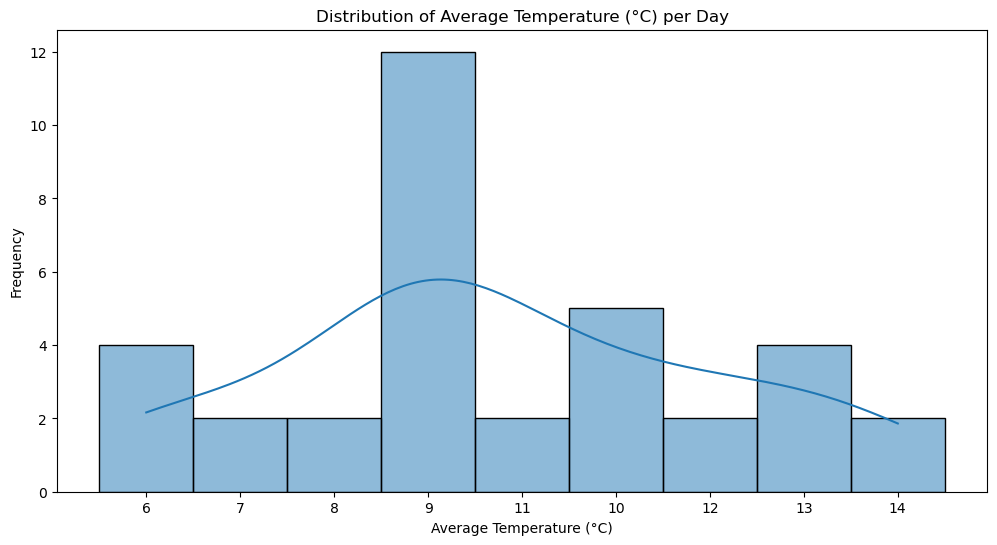

In [8]:
# plot distribution of values per day 
import matplotlib.pyplot as plt
import seaborn as sns



# plot the distribution of values per day
plt.figure(figsize=(12, 6))
sns.histplot(data=weather_df, x='avgtempC', bins=20, kde=True)
plt.title('Distribution of Average Temperature (°C) per Day')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# i want to find out if i have data for each day 
# 

In [26]:
data

{'data': {'request': [{'type': 'City', 'query': 'Dublin, Ireland'}],
  'nearest_area': [{'areaName': [{'value': 'Dublin'}],
    'country': [{'value': 'Ireland'}],
    'region': [{'value': 'Dublin'}],
    'latitude': '53.333',
    'longitude': '-6.249'}],
  'weather': [{'date': '2021-05-01',
    'astronomy': [{'sunrise': '05:51 AM',
      'sunset': '08:55 PM',
      'moonrise': '01:52 AM',
      'moonset': '08:47 AM',
      'moon_phase': 'Waning Gibbous',
      'moon_illumination': '65'}],
    'maxtempC': '8',
    'maxtempF': '47',
    'mintempC': '3',
    'mintempF': '37',
    'avgtempC': '6',
    'avgtempF': '43',
    'totalSnow_cm': '0.0',
    'sunHour': '13.0',
    'uvIndex': '3',
    'hourly': [{'time': '0',
      'tempC': '5',
      'tempF': '40',
      'windspeedMiles': '6',
      'windspeedKmph': '9',
      'winddirDegree': '305',
      'winddir16Point': 'NW',
      'weatherCode': '113',
      'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png